In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

###Definition of functions that will be used throughout the code


The function below is responsible for starting a population randomly, the parameters passed are the number of individuals in the population and the size of the board


In [ ]:
def init_population(population_size, n):
    population = []
    for _ in range(population_size):
        population.append(rd.sample(range(n), n))
    return population

#Exemplo de uso da função
N = 5
population = init_population(20, N)
print(population)

[[4, 0, 3, 2, 1], [3, 0, 4, 2, 1], [0, 2, 1, 4, 3], [4, 0, 1, 3, 2], [0, 1, 2, 3, 4], [4, 3, 0, 1, 2], [2, 0, 3, 4, 1], [4, 3, 0, 1, 2], [2, 0, 3, 4, 1], [1, 4, 2, 0, 3], [4, 0, 1, 2, 3], [2, 4, 3, 1, 0], [1, 0, 3, 2, 4], [1, 3, 0, 4, 2], [1, 2, 4, 0, 3], [3, 0, 4, 1, 2], [3, 0, 4, 1, 2], [3, 2, 4, 0, 1], [3, 2, 0, 4, 1], [0, 3, 1, 2, 4]]


The function below is responsible for calculating the number of attacks between queens for a given configuration


In [ ]:
def fitness_nq(solution):
    num_checks = 0
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            if i != j:
                if i - solution[i] == j - solution[j] or i + solution[i] == j + solution[j]:
                    num_checks += 1
    return num_checks

#Exemplo de uso da função
fitness_nq([6, 4, 0, 9, 2, 7, 3, 1, 8, 5])

4

The select_parents function randomly selects 5 individuals from the population and then chooses the 2 best parents based on their fitness values.


In [ ]:
def select_parents(population):
    parents = rd.sample(population, 5)
    parents_fitness = [[fitness_nq(each_solution), index] for index, each_solution in enumerate(parents)]
    parents_ordered = sorted(parents_fitness)
    parent1 = parents[parents_ordered[0][1]]
    parent2 = parents[parents_ordered[1][1]]
    return parent1, parent2

#Exemplo de uso da função
mother, father = select_parents(population)
print(mother)
print(father)

[0, 3, 1, 4, 2]
[4, 0, 2, 3, 1]


The generate_filhos function receives two selected parents and performs a crossover process, dividing the parents' genotypes into two parts and combining these parts to create two children.


In [ ]:
def generate_children(parent1, parent2, n):
    cut = rd.randint(0, n - 1)
    parent1_cut = parent1[:cut]
    parent1_after_cut = parent1[cut:]
    parent2_cut = parent2[:cut]
    parent2_after_cut = parent2[cut:]
    child1 = parent1_cut + parent2_after_cut
    child2 = parent2_cut + parent1_after_cut
    return child1, child2

#Exemplo de uso da função
child1, child2 = generate_children(mother, father, 3)
print(child1)
print(child2)

[0, 3, 2, 3, 1]
[4, 0, 1, 4, 2]


The children generated can mutate with a probability determined by the mutation_rate variable.


In [ ]:
def mutate(child, n, mutation_rate):
    index_gene1 = rd.randint(0, n)
    index_gene2 = rd.randint(0, n)
    if rd.random() < mutation_rate:
        child[index_gene1], child[index_gene2] = child[index_gene2], child[index_gene1]
    return child

#Exemplo de uso da função
print(child1)
mutant = mutate(child1, N-1, 0.8)
print(mutant)

[0, 3, 2, 3, 1]
[0, 3, 2, 1, 3]


The two individuals with the worst fitness in the population are eliminated, keeping the best individuals.


In [ ]:
def select_survivors(population):
    population_fitness = [[fitness_nq(each_solution), index] for index, each_solution in enumerate(population)]
    population_fitness_ordered = sorted(population_fitness)
    len_pop = len(population)
    worst_indices = [population_fitness_ordered[len_pop-1][1], population_fitness_ordered[len_pop-2][1]]

    for index in sorted(worst_indices, reverse=True):
        del population[index]
    return population

Design the board to improve visualization


In [ ]:
def draw_board(solution):
    n = len(solution)
    chessboard = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                chessboard[i][j] = 0.9

    plt.imshow(chessboard, cmap="gray", vmin=0, vmax=1)

    for i in range(n):
        plt.text(i, n - solution[i], "♛", ha="center", va="center", fontsize=30, color="teal")

    plt.xlim([-0.5, n - 0.5])
    plt.ylim([-0.5, n - 0.5])
    plt.axis("off")
    plt.show()

###Execution

The first step is to define the execution parameters as shown below


In [ ]:
N = 10
mu = 20
mutation_rate = 0.8
iterations = 0
flag = 0

Finally, the *main* code is executed with the parameters defined above. The code below stores the necessary Best fit and average fit information for statistical analysis through graphs



População da iteração 64: 
Population: [[7, 2, 6, 8, 1, 5, 9, 0, 4, 3], [6, 4, 1, 8, 0, 7, 3, 2, 5, 9], [4, 1, 7, 9, 2, 6, 3, 0, 5, 8], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [6, 4, 1, 8, 0, 5, 9, 0, 6, 3], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [6, 2, 6, 8, 1, 5, 9, 0, 7, 3], [6, 2, 6, 8, 1, 5, 9, 0, 7, 3], [0, 2, 6, 8, 1, 5, 9, 6, 6, 3], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [7, 2, 6, 8, 1, 5, 9, 0, 6, 3], [7, 2, 6, 8, 1, 5, 9, 6, 0, 3], [6, 2, 6, 8, 1, 5, 9, 0, 6, 3]]
Fitness: [2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Melhor solução: [6, 2, 6, 8, 1, 5, 9, 0, 6, 3], com 0 xeques


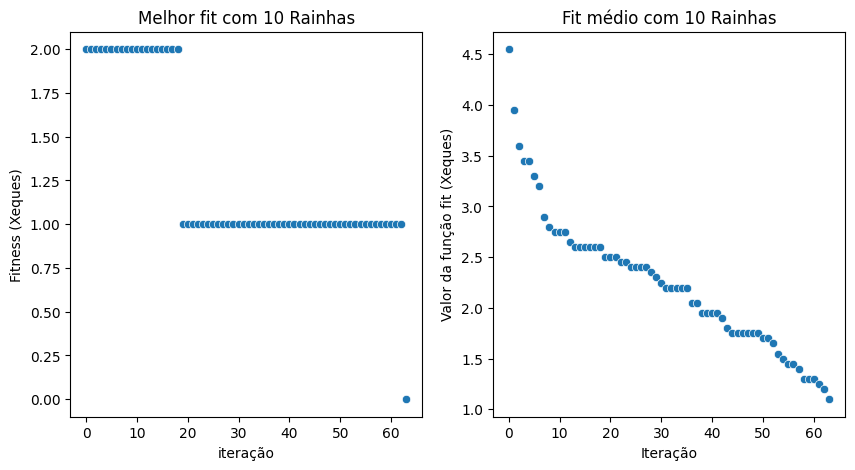

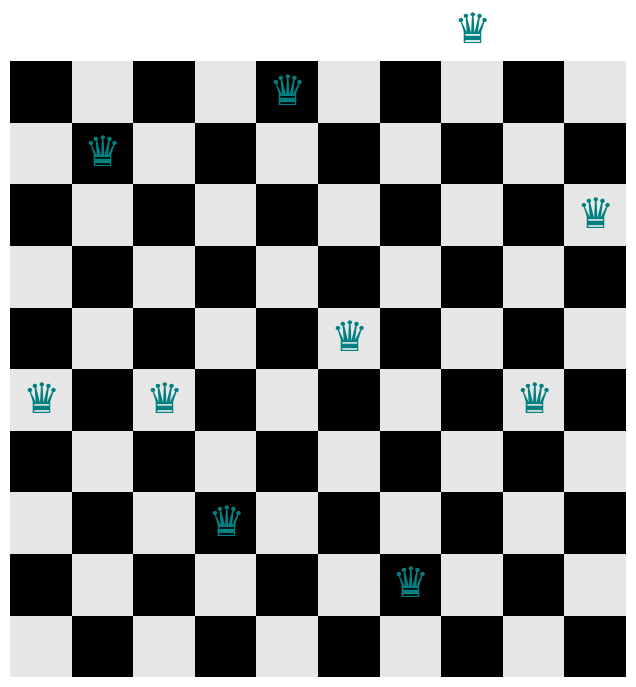

In [ ]:
best_fit = []
average_fit = []
population = init_population(mu, N)
fitness = [fitness_nq(each_solution) for each_solution in population]

while True:
    # Selecionar os pais
    parents = select_parents(population)

    # Gerar filhos
    child1, child2 = generate_children(parents[0], parents[1], N)

    # Mutar filhos
    child1 = mutate(child1, N-1, mutation_rate)
    child2 = mutate(child2, N-1, mutation_rate)

    # Atualizar a população e o fitness
    fitness.append(fitness_nq(child1))
    fitness.append(fitness_nq(child2))
    population.append(child1)
    population.append(child2)
    population = select_survivors(population)
    fitness = [fitness_nq(each_solution) for each_solution in population]

    #Alimentar informações para os gráficos
    best_fit.append(sorted(fitness)[0])
    average_fit.append(np.mean(fitness))

    # Atualizar contador
    iterations += 1

    # Checar condições
    if any(fit == 0 for fit in fitness) or iterations == 2000:
        print("\nPopulação da iteração {}: \nPopulation: {}\nFitness: {}".format(iterations, population, fitness))

        # Plots
        fig, axes = plt.subplots(1, 2)
        fig.set_figheight(5)
        fig.set_figwidth(10)

        fig1 = sns.scatterplot(data=best_fit, ax=axes[0])
        fig1.set(title="Melhor fit com {} Rainhas".format(N))
        fig1.set_xlabel('iteração')
        fig1.set_ylabel('Fitness (Xeques)')

        fig2 = sns.scatterplot(data=average_fit, ax=axes[1])
        fig2.set(title="Fit médio com {} Rainhas".format(N))
        fig2.set_xlabel('Iteração')
        fig2.set_ylabel('Valor da função fit (Xeques)')

        best_solution = population[fitness.index(min(fitness))]
        print("Melhor solução: {}, com {} xeques".format(best_solution, fitness_nq(best_solution)))
        fig, axes = plt.subplots()
        fig.set_figheight(8)
        fig.set_figwidth(8)
        draw_board(best_solution)

        break

In [ ]:
print(average_fit)
print(best_fit)

[4.55, 3.95, 3.6, 3.45, 3.45, 3.3, 3.2, 2.9, 2.8, 2.75, 2.75, 2.75, 2.65, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.5, 2.5, 2.5, 2.45, 2.45, 2.4, 2.4, 2.4, 2.4, 2.35, 2.3, 2.25, 2.2, 2.2, 2.2, 2.2, 2.2, 2.05, 2.05, 1.95, 1.95, 1.95, 1.95, 1.9, 1.8, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.7, 1.7, 1.65, 1.55, 1.5, 1.45, 1.45, 1.4, 1.3, 1.3, 1.3, 1.25, 1.2, 1.1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
